<a href="https://colab.research.google.com/github/nicha0524/DPDM2021/blob/main/Classification_(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit-learn คือ package ที่รวบรวมอัลกอริทึม ที่เกี่ยวข้องกับ machine learning และ data mining (sklearn)

# Load Data

In [46]:
from sklearn import datasets

iris_data = datasets.load_iris() #โหลด data 'iris ใน sklearn .ใช้คำสั่ง datasets.load_iris()

In [47]:
iris_data #ข้อมูลความยาว ความกว้างของ กลีบดอก กลีบเลี้ยง ของดอกไอลิส

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [48]:
X = iris_data['data']
Y = iris_data['target'] # target สายพันธุ์ของไอลิส

# Train Model

## import

In [49]:
from sklearn.tree import DecisionTreeClassifier # import คำสั่งเพื่อใช้สร้างต้นไม้

## define

In [50]:
mytree = DecisionTreeClassifier()  

## train

In [51]:
mytree.fit(X,Y) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## plot tree

In [52]:
from sklearn.tree import plot_tree

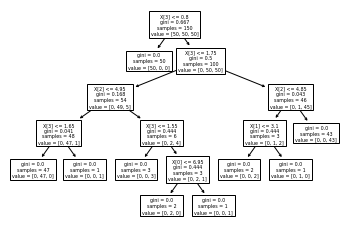

In [53]:
plot_tree(mytree); # สร้างแผนภาพต้นไม้

In [54]:
import numpy as np

In [55]:
np.random.seed(6)
np.random.choice(['kie','oil','nicha'])

'nicha'

# Evaluation

# advance tree

In [56]:
from sklearn import datasets


### หา data จาก: https://scikit-learn.org/stable/datasets/toy_dataset.html

In [57]:
mnist_data = datasets.load_digits() #ข้อมูล Optical recognition of handwritten digits dataset

In [58]:
mnist_data 

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

In [59]:
x =mnist_data['data'] 
x.shape    # ดูจำนวนข้อมูล

(1797, 64)

In [60]:
x[0,:]  # ดูข้อมูลแถวแรก

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [61]:
np.max(x) # ดูค่าสี 16 คือสีดำสีที่เข้มที่สุด 0 คือสีขาว

16.0

In [64]:
from matplotlib import   pyplot as plt
import numpy as np


In [65]:
Y = mnist_data['target']
Y.shape 

(1797,)

## แบ่ง test เอาไว้วัดผลอย่างเดียว

In [66]:
from sklearn.model_selection import train_test_split

##### วิธีแบ่ง train และ test จาก: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

###### X_train คือข้อมูลสำหรับการสอนโมเดล และ y_train เพื่อให้โมเดลเปรียบเทียบว่าต่างจากผลที่คำนวณแค่ไหน

In [67]:
X_train, X_test, y_train, y_test = train_test_split( x, Y, test_size=0.50, random_state=6)

In [68]:
X_train[:5,:6]

array([[ 0.,  0.,  8., 15.,  9.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  0.],
       [ 0.,  1., 12., 16., 16., 16.],
       [ 0.,  0., 12., 14.,  6.,  0.],
       [ 0.,  0.,  1.,  8.,  8.,  9.]])

## เริ่มสร้าง model 


    max_depth : กำหนดจำนวนชั้นของต้นไม้
    min_ samples_split : จำนวนตัวอย่างขั้นต่ำที่จำเป็นในหารแยกโหนด
    min_ samples_leaf : จำนวน observations ขั้นต่ำที่อยู่ใน leaf node
    min_weight_fraction_leaf : ถ่วงน้ำหนักว่าให้ความสำคัญกับอันไหนมากกว่า
    max_features : สามารถสุ่มหยิบ feature ไปได้มากที่สุดกี่ % 
    random_state : ค่า seed ที่กำหนดการ random กลุ่มข้อมูล จะเป็นเลขจำนวนเต็ม ถ้ากำหนดเลขเดิม ผลก็เหมือนเดิม
    max_leaf_nodes : เป็นการกำหนกว่ามีใบครบกี่ใบแล้วจะหยุดการเจริญเติบโต
    min_impurity_decrease : ถ้าข้อมูลยังมีสัดส่วนเท่าเดิมก็จะตัดให้หยุดโต เพราะโตไปมากกว่านี้ก็มีสัดส่วนเท่าเดิม


1. ใช้ Entropy มี ความสูงไม่เกิน 4 ชั้น (Oil)
2. ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5 (Nicha)
3. ใช้ Entropy และ มี จำนวน leaf node ไม่เกิน 15 (Kie)

### หา validation set
 

#####ข้อมูลที่ใช้ในการตรวจสอบความแม่นยำของโมเดล ระหว่างการ Train แบ่งข้อมูลเป็น X_train, y_train

In [69]:
X_traintrain, X_val, y_traintrain, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=6) # กำหนดส่วน test 30 %

In [70]:
X_traintrain[:5,:7]

array([[ 0.,  0.,  9., 16., 10.,  2.,  0.],
       [ 0.,  1., 15.,  4.,  0.,  0.,  0.],
       [ 0.,  0.,  4., 14., 16., 15.,  1.],
       [ 0.,  0.,  3., 11., 14., 12.,  3.],
       [ 0.,  0.,  5., 12., 16., 15.,  0.]])

####Import

In [71]:
from sklearn.tree import DecisionTreeClassifier # import คำสั่งเพื่อใช้สร้างต้นไม้

####Define

In [72]:
mytree = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5) # ใช้ Gini และ leaf node ต้องมีจำนวน data ไม่น้อยกว่า 5

####Train

In [73]:
mytree.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

####plot tree

In [74]:
from sklearn.tree import plot_tree

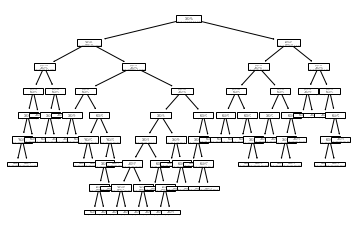

In [75]:
plot_tree(mytree); # สร้างแผนภาพต้นไม้

In [76]:
mytree0 = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=30,min_samples_leaf=5)
mytree0.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
mytree1 = DecisionTreeClassifier(criterion='entropy',max_depth=4) 
mytree1.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [78]:
mytree2 = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5) 
mytree2.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [79]:
mytree3 = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=15) 
mytree3.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#ทดสอบหา model ที่ดีที่สุดด้วย validation set

In [80]:
t0_result =mytree0.predict(X_val)

In [81]:
t0_result

array([7, 7, 3, 0, 8, 4, 7, 7, 0, 9, 3, 2, 6, 1, 8, 4, 3, 3, 8, 6, 2, 9,
       5, 4, 3, 6, 3, 4, 7, 8, 4, 1, 8, 5, 3, 3, 4, 1, 2, 0, 8, 0, 6, 5,
       3, 4, 6, 0, 6, 8, 2, 8, 6, 0, 9, 7, 0, 8, 5, 8, 0, 1, 5, 6, 5, 2,
       7, 9, 3, 1, 4, 9, 7, 5, 6, 4, 5, 0, 5, 8, 3, 4, 7, 5, 8, 4, 8, 9,
       1, 7, 1, 6, 7, 0, 8, 3, 8, 7, 1, 6, 7, 8, 1, 8, 8, 5, 4, 9, 6, 1,
       2, 5, 6, 3, 0, 3, 7, 1, 9, 8, 4, 7, 9, 5, 5, 6, 0, 8, 6, 4, 2, 9,
       8, 8, 6, 1, 1, 2, 3, 8, 9, 9, 5, 1, 5, 9, 5, 9, 8, 6, 3, 8, 6, 8,
       2, 2, 1, 4, 0, 1, 2, 6, 7, 4, 8, 9, 3, 4, 2, 7, 5, 0, 3, 0, 1, 6,
       4, 8, 1, 8, 4, 3, 9, 5, 5, 8, 5, 6, 1, 5, 8, 5, 7, 1, 8, 4, 3, 7,
       9, 6, 7, 1, 4, 7, 5, 7, 7, 8, 2, 5, 5, 8, 5, 4, 8, 4, 8, 8, 9, 4,
       5, 8, 2, 8, 5, 0, 9, 3, 4, 6, 3, 3, 1, 4, 2, 5, 4, 5, 0, 0, 3, 7,
       8, 5, 0, 8, 7, 5, 6, 3, 6, 4, 3, 9, 8, 6, 1, 3, 7, 6, 4, 8, 8, 5,
       1, 1, 2, 7, 7, 9])

In [82]:
y_val

array([4, 7, 3, 0, 6, 4, 7, 7, 0, 9, 3, 2, 6, 8, 8, 4, 3, 2, 7, 6, 2, 9,
       5, 6, 5, 6, 9, 4, 7, 2, 4, 1, 7, 5, 3, 3, 4, 1, 2, 0, 8, 0, 6, 5,
       3, 4, 6, 0, 6, 8, 2, 1, 6, 0, 9, 7, 0, 6, 3, 8, 0, 4, 5, 6, 9, 2,
       3, 9, 3, 1, 4, 9, 7, 5, 6, 7, 5, 0, 5, 8, 3, 6, 3, 9, 8, 4, 9, 9,
       8, 7, 1, 6, 3, 0, 8, 9, 8, 1, 1, 8, 7, 8, 4, 8, 8, 3, 4, 9, 6, 1,
       2, 5, 6, 3, 0, 7, 7, 1, 9, 7, 4, 4, 9, 5, 5, 6, 0, 8, 6, 6, 2, 9,
       8, 9, 6, 9, 1, 2, 3, 8, 9, 0, 5, 1, 9, 9, 5, 9, 3, 6, 5, 0, 6, 8,
       2, 2, 4, 2, 0, 1, 2, 6, 1, 4, 3, 9, 3, 4, 2, 7, 8, 0, 9, 0, 6, 6,
       4, 3, 5, 8, 4, 3, 9, 6, 5, 4, 5, 6, 3, 5, 4, 5, 7, 1, 2, 4, 5, 7,
       9, 6, 7, 2, 1, 4, 6, 7, 4, 8, 2, 5, 5, 7, 5, 4, 8, 7, 3, 3, 9, 4,
       5, 8, 2, 8, 5, 0, 9, 3, 4, 6, 3, 3, 1, 4, 2, 5, 4, 9, 0, 0, 3, 7,
       8, 5, 0, 9, 7, 5, 6, 3, 6, 4, 9, 9, 8, 6, 1, 3, 7, 6, 4, 0, 8, 5,
       9, 3, 2, 1, 1, 9])

In [83]:
from sklearn.metrics import  accuracy_score


In [84]:
accuracy_score(y_val,t0_result)

0.737037037037037

In [85]:
t1_result =mytree1.predict(X_val)
accuracy_score(y_val,t1_result)

0.6851851851851852

In [86]:
t2_result =mytree2.predict(X_val)
accuracy_score(y_val,t2_result)

0.7666666666666667

In [87]:
t3_result =mytree3.predict(X_val)
accuracy_score(y_val,t3_result)

0.6962962962962963

#สร้าง model จริง

In [96]:
mytree2Full = DecisionTreeClassifier(criterion='gini',min_samples_leaf=5) 
mytree2Full.fit(X_traintrain,y_traintrain) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [97]:
final_result = mytree2Full.predict(X_test)

In [98]:
accuracy_score(y_test,final_result)

0.7397107897664071

# 3 Machine learning

0. your data & all data in the world
1. split data > trian validation
2. finding the best model
3..evaluate the model

In [105]:
 from sklearn.naive_bayes import BernoulliNB

In [106]:
gnb = BernoulliNB()

In [107]:
 y_pred = gnb.fit(X_train, y_train).predict(X_val)

In [109]:
 y_pred

array([4, 7, 3, 0, 6, 4, 4, 7, 0, 9, 3, 2, 6, 7, 8, 4, 3, 2, 7, 6, 2, 9,
       5, 6, 5, 6, 9, 4, 7, 2, 4, 1, 7, 5, 3, 3, 4, 1, 2, 0, 8, 0, 6, 5,
       3, 4, 6, 0, 6, 8, 2, 8, 6, 0, 9, 7, 0, 6, 9, 8, 0, 4, 5, 6, 9, 2,
       3, 9, 3, 1, 4, 9, 7, 5, 6, 7, 5, 0, 5, 9, 3, 6, 5, 8, 8, 4, 3, 9,
       8, 7, 1, 6, 8, 0, 8, 9, 8, 1, 1, 3, 7, 8, 4, 8, 8, 5, 4, 9, 6, 1,
       2, 5, 6, 9, 0, 7, 7, 1, 9, 7, 4, 1, 9, 5, 5, 6, 0, 8, 6, 4, 2, 9,
       8, 9, 6, 1, 8, 2, 3, 1, 9, 0, 5, 1, 9, 9, 5, 9, 3, 6, 9, 0, 6, 8,
       2, 2, 4, 2, 0, 1, 2, 6, 1, 4, 3, 9, 3, 4, 2, 7, 8, 0, 9, 0, 6, 6,
       4, 3, 5, 8, 4, 3, 9, 6, 5, 4, 5, 6, 3, 5, 4, 5, 7, 9, 2, 4, 5, 7,
       9, 6, 7, 1, 1, 4, 6, 7, 4, 3, 2, 5, 5, 7, 5, 4, 8, 7, 3, 3, 9, 4,
       5, 8, 2, 8, 5, 0, 9, 3, 4, 6, 3, 3, 1, 4, 2, 5, 4, 9, 0, 0, 2, 7,
       8, 5, 0, 9, 7, 1, 6, 3, 6, 4, 9, 9, 8, 6, 4, 3, 7, 6, 4, 0, 9, 9,
       4, 3, 2, 1, 1, 9])

In [110]:
accuracy_score(y_val, y_pred)

0.9